In [222]:
#GIS Plotting Project Draft

#---Script Objective & Work Plan---
#---My main objective for my portion of the plotting project is to create statistical plots & figures
#---based on user input. User will provide the geodatabase and shapefile that they're using, in addition to 
#---what specific data they would like to plot from the shapefile. For the desired figure, the user will also input parameters for visualization
#---such as figure size, margins, labels, data points from the gdb/shapefile, etc.

#---Future Work Plan: At the moment, this code is a work in progress. Currently I am testing it with simple visualizations
#---such as a bar graph using the CITIES.SHP file in the USA gdb. However, I would like to expand this to other figures such as
#---scatterplots, xy plots, and statistical distribution figures like histograms and boxplots if possible.

#----Currently a work in progress. Code below is what I've written so far----

In [223]:
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import os
import numpy as np

In [224]:
#Importing gdb
gdb_path = input(r"Insert geodatabase path: ")

Insert geodatabase path: C:\Users\UofM\Downloads\USA


In [225]:
layers = fiona.listlayers(gdb_path)
for shp in layers:
    print(shp) 

adi
CITIES
COUNTIES
DRAINAGE
LAKES
places
Rivers
ROADS
ROADS_RT
STATES
zip_usa


In [226]:
all_files = os.listdir(gdb_path)
print(all_files)

['adi.avl', 'adi.dbf', 'adi.prj', 'adi.sbn', 'adi.sbx', 'adi.shp', 'adi.shx', 'cities.avl', 'Cities.dbf', 'cities.prj', 'CITIES.SBN', 'CITIES.SBX', 'CITIES.SHP', 'CITIES.SHX', 'counties.avl', 'Counties.dbf', 'counties.prj', 'COUNTIES.SBN', 'COUNTIES.SBX', 'COUNTIES.SHP', 'COUNTIES.shp.xml', 'COUNTIES.SHX', 'drainage.avl', 'DRAINAGE.DBF', 'drainage.prj', 'DRAINAGE.SBN', 'DRAINAGE.SBX', 'DRAINAGE.SHP', 'DRAINAGE.SHX', 'lakes.avl', 'LAKES.DBF', 'lakes.prj', 'LAKES.SBN', 'LAKES.SBX', 'LAKES.SHP', 'LAKES.SHX', 'places.avl', 'places.dbf', 'places.ixs', 'places.mxs', 'places.prj', 'places.sbn', 'places.sbx', 'places.shp', 'places.shx', 'rivers.avl', 'Rivers.dbf', 'rivers.prj', 'Rivers.sbn', 'Rivers.sbx', 'Rivers.shp', 'Rivers.shx', 'roads.avl', 'ROADS.DBF', 'roads.prj', 'ROADS.SBN', 'ROADS.SBX', 'ROADS.SHP', 'ROADS.SHX', 'roads_rt.avl', 'ROADS_RT.DBF', 'roads_rt.prj', 'ROADS_RT.SBN', 'ROADS_RT.SBX', 'ROADS_RT.SHP', 'ROADS_RT.SHX', 'states.avl', 'States.dbf', 'states.prj', 'STATES.SBN', 'STATE

In [227]:
shapefiles = []
for file in all_files:
    if file.endswith(('.shp','.SHP')):
        shapefiles.append(file)
print(shapefiles)

['adi.shp', 'CITIES.SHP', 'COUNTIES.SHP', 'DRAINAGE.SHP', 'LAKES.SHP', 'places.shp', 'Rivers.shp', 'ROADS.SHP', 'ROADS_RT.SHP', 'STATES.SHP', 'zip_usa.shp']


In [228]:
print("Available shapefiles:")
for shp in shapefiles:
    print(shp)
input_shp = input("Insert shapefile you'd like to use: ")
shp_path = os.path.join(gdb_path, input_shp)
print(shp_path)

Available shapefiles:
adi.shp
CITIES.SHP
COUNTIES.SHP
DRAINAGE.SHP
LAKES.SHP
places.shp
Rivers.shp
ROADS.SHP
ROADS_RT.SHP
STATES.SHP
zip_usa.shp
Insert shapefile you'd like to use: CITIES.SHP
C:\Users\UofM\Downloads\USA\CITIES.SHP


In [229]:
shp = gpd.read_file(shp_path)
print(shp.columns)

Index(['CITY_FIPS', 'CITY_NAME', 'STATE_FIPS', 'STATE_NAME', 'STATE_CITY',
       'TYPE', 'CAPITAL', 'ELEVATION', 'POP1990', 'HOUSEHOLDS', 'MALES',
       'FEMALES', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN_PI', 'OTHER',
       'HISPANIC', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_64', 'AGE_65_UP',
       'NEVERMARRY', 'MARRIED', 'SEPARATED', 'WIDOWED', 'DIVORCED',
       'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD',
       'FHH_CHILD', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'MEDIAN_VAL', 'MEDIANRENT', 'UNITS_1DET', 'UNITS_1ATT', 'UNITS2',
       'UNITS3_9', 'UNITS10_49', 'UNITS50_UP', 'MOBILEHOME', 'geometry'],
      dtype='object')


In [230]:
col_list = []
for col in shp:
    col_list.append(col)
print(col_list)

['CITY_FIPS', 'CITY_NAME', 'STATE_FIPS', 'STATE_NAME', 'STATE_CITY', 'TYPE', 'CAPITAL', 'ELEVATION', 'POP1990', 'HOUSEHOLDS', 'MALES', 'FEMALES', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN_PI', 'OTHER', 'HISPANIC', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_64', 'AGE_65_UP', 'NEVERMARRY', 'MARRIED', 'SEPARATED', 'WIDOWED', 'DIVORCED', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'MEDIAN_VAL', 'MEDIANRENT', 'UNITS_1DET', 'UNITS_1ATT', 'UNITS2', 'UNITS3_9', 'UNITS10_49', 'UNITS50_UP', 'MOBILEHOME', 'geometry']


In [231]:
shp.head()

,CITY_FIPS,CITY_NAME,STATE_FIPS,STATE_NAME,STATE_CITY,TYPE,CAPITAL,ELEVATION,POP1990,HOUSEHOLDS,...,MEDIAN_VAL,MEDIANRENT,UNITS_1DET,UNITS_1ATT,UNITS2,UNITS3_9,UNITS10_49,UNITS50_UP,MOBILEHOME,geometry
0,05280,Bellingham,53,Washington,5305280,city,N,-99,52179,21189,...,89100,371,12808,368,1198,2267,3317,1229,732,POINT (-122.46818 48.74388)
1,35050,Havre,30,Montana,3035050,city,N,2494,10201,4027,...,56000,242,2576,57,278,651,303,86,334,POINT (-109.67986 48.54382)
2,01990,Anacortes,53,Washington,5301990,city,N,-99,11451,4669,...,85300,342,3724,121,134,380,353,0,200,POINT (-122.63069 48.49222)
3,47560,Mount Vernon,53,Washington,5347560,city,N,-99,17647,6885,...,78500,359,4138,154,248,791,1014,171,592,POINT (-122.31577 48.42156)
4,50360,Oak Harbor,53,Washington,5350360,city,N,-99,17176,5971,...,86500,411,3315,301,177,1004,872,0,405,POINT (-122.62893 48.30790)


In [251]:
i = 0
print("List of columns in your shapefile: ")
for col in col_list:
    print(i, col)
    i += 1
print("\n")
input_col1 = input("Insert the 1st column you'd like to use: ")
input_col2 = input("Insert the 2nd column you'd like to use: ")
input_col1_list = []
input_col2_list = []
print(input_col1, "\t" , input_col2)
for i, row in shp.iterrows():
    input_col1_list.append(row[input_col1])
    input_col2_list.append(row[input_col2])
    print(row[input_col1], "\t" , row[input_col2])

List of columns in your shapefile: 
0 CITY_FIPS
1 CITY_NAME
2 STATE_FIPS
3 STATE_NAME
4 STATE_CITY
5 TYPE
6 CAPITAL
7 ELEVATION
8 POP1990
9 HOUSEHOLDS
10 MALES
11 FEMALES
12 WHITE
13 BLACK
14 AMERI_ES
15 ASIAN_PI
16 OTHER
17 HISPANIC
18 AGE_UNDER5
19 AGE_5_17
20 AGE_18_64
21 AGE_65_UP
22 NEVERMARRY
23 MARRIED
24 SEPARATED
25 WIDOWED
26 DIVORCED
27 HSEHLD_1_M
28 HSEHLD_1_F
29 MARHH_CHD
30 MARHH_NO_C
31 MHH_CHILD
32 FHH_CHILD
33 HSE_UNITS
34 VACANT
35 OWNER_OCC
36 RENTER_OCC
37 MEDIAN_VAL
38 MEDIANRENT
39 UNITS_1DET
40 UNITS_1ATT
41 UNITS2
42 UNITS3_9
43 UNITS10_49
44 UNITS50_UP
45 MOBILEHOME
46 geometry


Insert the 1st column you'd like to use: CITY_NAME
Insert the 2nd column you'd like to use: POP1990
CITY_NAME 	 POP1990
Bellingham 	 52179
Havre 	 10201
Anacortes 	 11451
Mount Vernon 	 17647
Oak Harbor 	 17176
Minot 	 34544
Kalispell 	 11917
Williston 	 13131
Port Angeles 	 17710
North Marysville 	 18711
Marysville 	 10328
West Lake Stevens 	 12453
Everett 	 69961
Grand Forks 	 49425


What plot would you like to use? Bar Graph


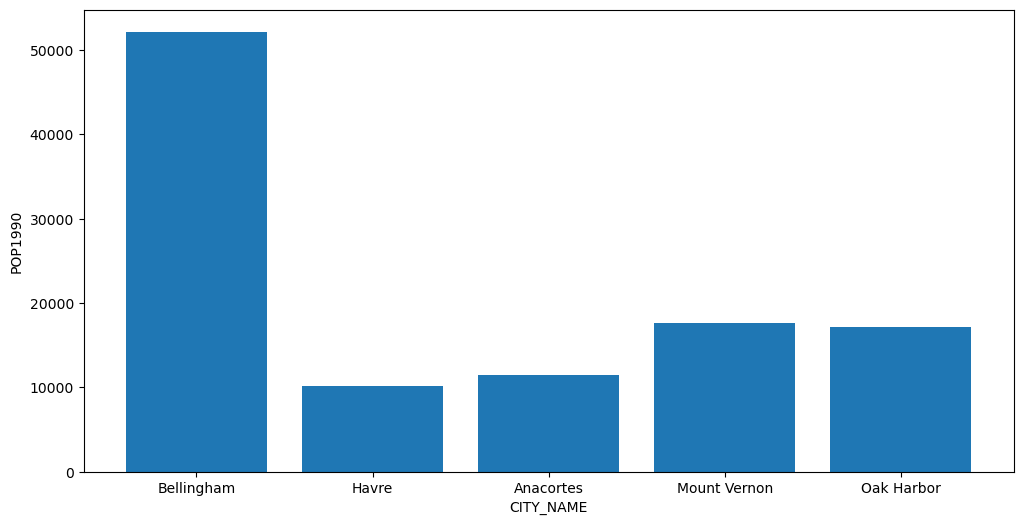

In [271]:
input_figure = input("What plot would you like to use? ")
if input_figure == 'Bar Graph':
    xAxis = input_col1_list[0:5]
    yAxis = input_col2_list[0:5]
    fig, ax = plt.subplots(figsize=(12, 6))
    # Create bar graph
    plt.bar(xAxis, yAxis)
    plt.xlabel(input_col1)
    plt.ylabel(input_col2)
    plt.title('')
    plt.show()